Description of the columns are as follows:

    ID: Customer ID
    Age : Customer Age
    Experience : Customer Experience
    Income : Income of the Customer
    ZipCode: Customer's residence zipcode
    Family : No of Family members of the customer
    CCAvg: Credit Card Average Score
    Education: Education of the customer
    Mortgage: Mortgage taken or not taken by the customer
    Personal Loan: 0 = No personal loan given , 1 = personal loan given
    Securities Account : Having or not having a Securities Account
    CD Account : Having or not having a CD Account
    Online : Having or not having online banking
    Credit Card : Having or not having a credit card

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
#read csv
data = pd.read_csv('bankloan.csv')
data

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [47]:
# calculate that how many people have loan and does not have loan
loan_counts = data['Personal.Loan'].value_counts()
loan_counts

0    4520
1     480
Name: Personal.Loan, dtype: int64

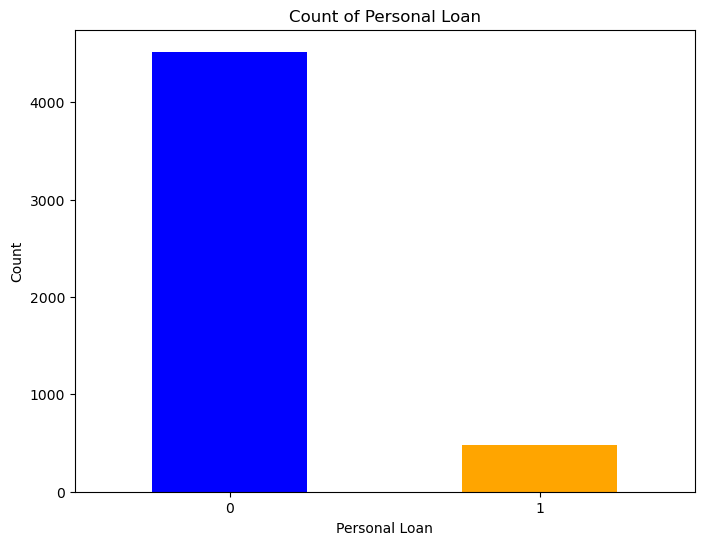

In [48]:
# histrogram
plt.figure(figsize=(8, 6))
loan_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Count of Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [49]:
# Features and the target catergory , this time the mission to predict if the personal loan is granted
# Remove ID & ZipCode
X = data.drop(['Personal.Loan', 'ID', 'ZIP.Code'], axis=1)
y = data['Personal.Loan']

In [50]:
# seperate between testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Use Decision Tree Model
model = DecisionTreeClassifier(random_state=42)

In [52]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
# Predict
y_pred = model.predict(X_test)

In [54]:
# merge prediction results with dataframe
results = pd.DataFrame({'Prediction': y_pred})
results = pd.concat([X_test.reset_index(drop=True), results], axis=1)
results

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard,Prediction
0,30,4,35,2,0.3,2,0,1,0,0,1,0
1,47,23,149,4,6.1,1,0,0,0,0,1,1
2,30,5,121,2,3.1,1,408,0,0,1,0,0
3,31,6,62,1,1.0,1,0,1,0,1,0,0
4,62,36,30,3,0.7,2,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,65,40,59,3,2.4,1,0,0,0,0,0,0
996,58,32,54,3,0.3,2,0,0,0,1,1,0
997,61,37,33,3,0.1,3,0,0,0,1,0,0
998,33,9,38,1,2.1,3,133,0,0,0,0,0


In [55]:
#Model Accuracy Assessment
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.988
Confusion Matrix:
[[890   5]
 [  7  98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.95      0.93      0.94       105

    accuracy                           0.99      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000

